In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from datetime import date, timedelta
import numpy as np

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 6)

In [3]:
repos_path = "C:/Users/MANOJ/the-building-data-genome-project/"

In [11]:
# We load the consumption of each building as a time series.
# Each building was recorded at different time ranges.
time_series = pd.read_csv(os.path.join(repos_path,"data/raw/temp_open_utc.csv"), index_col="timestamp", parse_dates=True)

In [18]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40940 entries, 2010-01-01 08:00:00 to 2016-01-01 06:00:00
Columns: 507 entries, PrimClass_Jolie to PrimClass_Ulysses
dtypes: float64(507)
memory usage: 158.7 MB


In [12]:
time_series.head(5)

,PrimClass_Jolie,PrimClass_Jaylin,Office_Jesus,PrimClass_Jayla,PrimClass_Janiya,PrimClass_Janice,Office_Jett,Office_Jerry,PrimClass_Jaden,PrimClass_Jermaine,...,UnivLab_Aine,UnivLab_Anita,UnivLab_Alisa,UnivDorm_Adriana,UnivLab_Aoife,PrimClass_Uma,PrimClass_Umar,UnivDorm_Una,PrimClass_Uriah,PrimClass_Ulysses
timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# The metadata contains information on each building, such as
# start data, end date,
# Heating type, industry, number of floors,
# occupants, space usage (office, lab, classroom), area
# time-zone, age of the building,
# corresponding weather file.
metadata = pd.read_csv(os.path.join(repos_path,"data/raw/meta_open.csv"), index_col='uid', parse_dates=["datastart","dataend"], dayfirst=True)

In [19]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, PrimClass_Everett to UnivLab_Aoife
Data columns (total 18 columns):
dataend                   507 non-null datetime64[ns]
datastart                 507 non-null datetime64[ns]
energystarscore           26 non-null float64
heatingtype               124 non-null object
industry                  507 non-null object
mainheatingtype           122 non-null object
numberoffloors            124 non-null float64
occupants                 105 non-null float64
primaryspaceusage         507 non-null object
rating                    131 non-null object
sqft                      507 non-null float64
sqm                       507 non-null float64
subindustry               507 non-null object
timezone                  507 non-null object
yearbuilt                 313 non-null object
nickname                  507 non-null object
primaryspaceuse_abbrev    507 non-null object
newweatherfilename        507 non-null object
dtypes: datetime64[ns](2),

In [16]:
metadata.tail(5)

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
uid,,,,,,,,,,,,,,,,,,
Office_Lane,2015-11-30 23:00:00,2014-12-01,NaN,Heat network,Education,Heat Network,8.0,NaN,Office,NaN,34455.2439,3201.000000,College/University,Europe/London,1907,Lane,Office,weather5.csv
Office_Cameron,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,53303.0000,4952.008609,College/University,America/New_York,1981,Cameron,Office,weather2.csv
UnivLab_Lea,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Education,Gas,6.0,NaN,College Laboratory,NaN,16802.4479,1561.000000,College/University,Europe/London,1995,Lea,UnivLab,weather5.csv
UnivLab_Carlos,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,30143.0000,2800.375129,College/University,America/New_York,1951,Carlos,UnivLab,weather2.csv
UnivLab_Aoife,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,261188.0000,24265.148760,College/University,America/Phoenix,NaN,Aoife,UnivLab,weather0.csv


In [ ]:
# A function to plot the selected type of building for the entire time range it was recorded
sns.set_style("whitegrid")
sns.set_context(font_scale=1.5)
def plot_buildingtype_zoomedin(meta, temp, primaryusetype):
    metalist = meta.datastart.unique() # unique() returns array of only unique values in the series. repetitions are skipped
    for datastarttime in metalist[:2]:

        to_plot_info = meta[(meta.primaryspaceuse_abbrev == primaryusetype) & (meta.datastart == datastarttime)]
        to_plot_names = to_plot_info.index.sort_values()
        
        print "Plotting "+primaryusetype+" with start time: "+str(datastarttime)
        print "This includes the following buildings: "+str(list(to_plot_names))
        
        # See if there is any data to be plotted
        try:
            length = len(to_plot_names)
            plotsize = length*2.5

            starttime = datastarttime + np.timedelta64(275,'D')
            endtime = to_plot_info.dataend.unique()[0] 

            to_plot_data = temp[to_plot_names].truncate(before=starttime, after=endtime)

            to_plot_data.plot(subplots=True, figsize=(15,plotsize))
            plt.tight_layout()

            starttimestring = str(datastarttime)
            #plt.savefig(os.path.join(repos_path,"reports/figures/overviewlinecharts/"+primaryusetype+"_"+starttimestring[:-19]+"_zoomedin.png"))
            plt.show()

        except:
            print "no data to plot"
            continue

Plotting PrimClass with start time: 2012-01-01T00:00:00.000000000
This includes the following buildings: ['PrimClass_Ebony', 'PrimClass_Edmund', 'PrimClass_Edwin', 'PrimClass_Eleanor', 'PrimClass_Eli', 'PrimClass_Elijah', 'PrimClass_Elisabeth', 'PrimClass_Ellen', 'PrimClass_Elliott', 'PrimClass_Elmer', 'PrimClass_Emanuela', 'PrimClass_Emilio', 'PrimClass_Emily', 'PrimClass_Eoghan', 'PrimClass_Ernest', 'PrimClass_Ernesto', 'PrimClass_Ervin', 'PrimClass_Esmeralda', 'PrimClass_Ethan', 'PrimClass_Ethel', 'PrimClass_Eva', 'PrimClass_Everett', 'PrimClass_Evie', 'PrimClass_Ezekiel', 'PrimClass_Ezra']


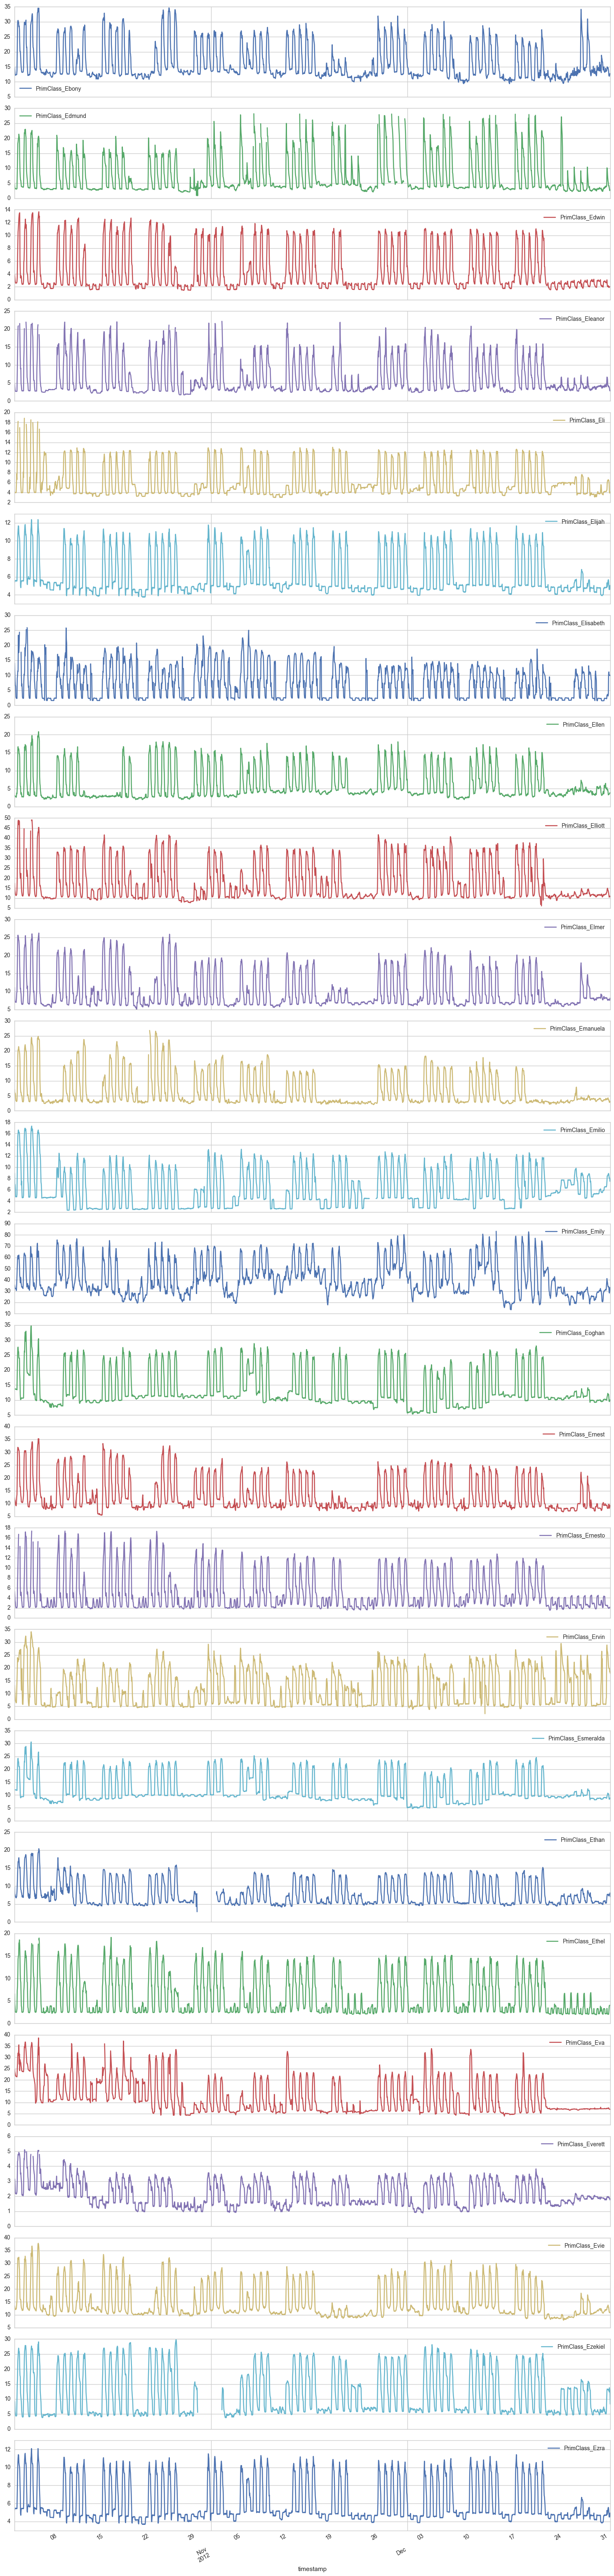

Plotting PrimClass with start time: 2015-01-01T00:00:00.000000000
This includes the following buildings: ['PrimClass_Angel', 'PrimClass_Angela']


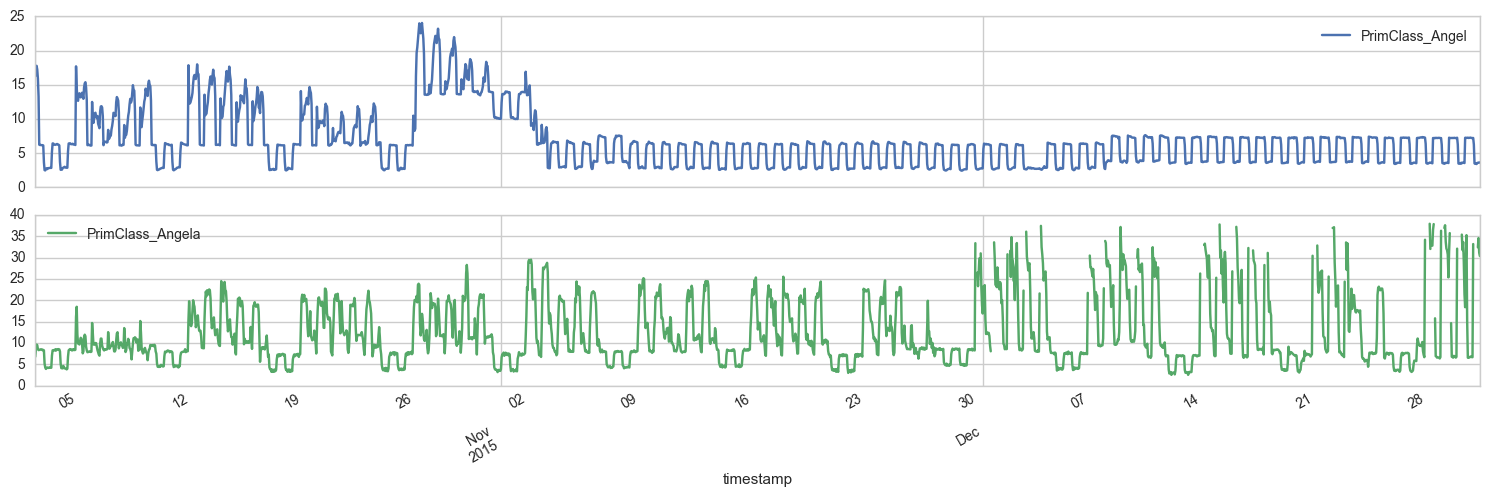

In [27]:
plot_buildingtype_zoomedin(metadata, time_series, "PrimClass")

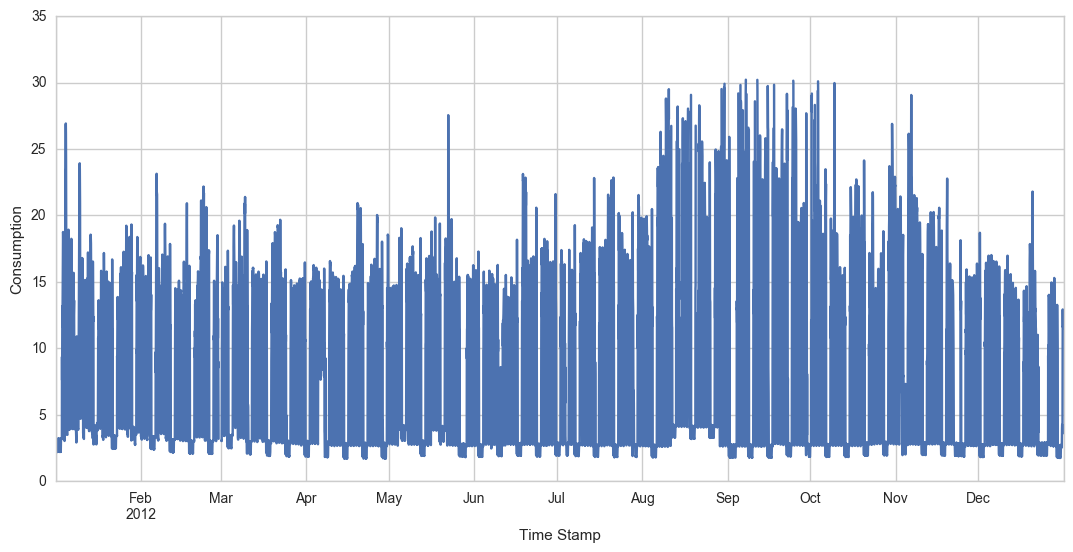

In [28]:
building_selected = 'Office_Elizabeth'

start = meta.ix[building_selected]['datastart']
end = meta.ix[building_selected]['dataend']

time_series[building_selected][start:end].plot()
plt.xlabel('Time Stamp')
plt.ylabel('Consumption')

In [45]:
weather_file = metadata[metadata.index == building_selected]['newweatherfilename'][building_selected]

In [46]:
weather = pd.read_csv(os.path.join(repos_path,"data/external/weather/",weather_file),index_col="timestamp", parse_dates=True)

In [47]:
start_date = '2012-02-01'
end_date = '2012-02-03'

In [48]:
temperature = weather[['TemperatureC']].resample('H').mean()
humidity = weather[['Humidity']].resample('H').mean()
temperature = temperature[start_date:end_date]
humidity = humidity[start_date:end_date]

In [49]:
office = temp[['Office_Elizabeth']][start_date:end_date]

Function for normalize

In [50]:
def normalize(df):
    return (df-df.min())/(df.max()-df.min())

In [51]:
frame = normalize(office.join(temperature.join(humidity)))

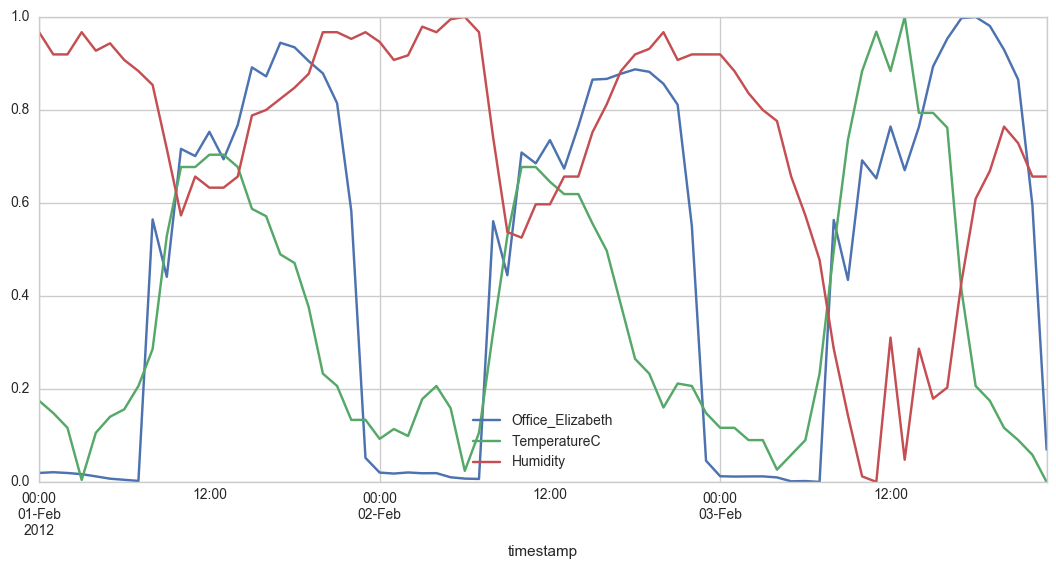

In [52]:
frame.plot()